<a href="https://colab.research.google.com/github/PatricRc/Manejo_Pandas_basico/blob/main/Tutorial_Pandas_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando los nombres

In [ ]:
#Importar biblioteca
import pandas as pd

In [ ]:
#Cargar las bases de datos en formato json desde una URL
nombres_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nombres_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [ ]:
#Cambiar de nombre a las columnas
nombres_m.rename(columns={'nome':'nombre','regiao':'region','rank':'rango'}, inplace=True)
nombres_f.rename(columns={'nome':'nombre','regiao':'region','rank':'rango'}, inplace=True)

In [ ]:
print("Cantidad de nombres: " + str(len(nombres_m) + len(nombres_f)))

Cantidad de nombres: 400


In [ ]:
#Creación de marcos
frames = [nombres_m, nombres_f]

In [ ]:
frames

[        nombre  region     freq  rango sexo
 0         JOSE       0  5732508      1    M
 1         JOAO       0  2971935      2    M
 2      ANTONIO       0  2567494      3    M
 3    FRANCISCO       0  1765197      4    M
 4       CARLOS       0  1483121      5    M
 ..         ...     ...      ...    ...  ...
 195     WALTER       0    67207    196    M
 196    ARLINDO       0    66669    197    M
 197    MICHAEL       0    65736    198    M
 198     ALVARO       0    65444    199    M
 199    GEOVANE       0    65435    200    M
 
 [200 rows x 5 columns],         nombre  region      freq  rango sexo
 0        MARIA       0  11694738      1    F
 1          ANA       0   3079729      2    F
 2    FRANCISCA       0    721637      3    F
 3      ANTONIA       0    588783      4    F
 4      ADRIANA       0    565621      5    F
 ..         ...     ...       ...    ...  ...
 195     ROSANE       0     82203    196    F
 196    IVONETE       0     81878    197    F
 197    LUCIANE     

In [ ]:
# Dataframe de nombres y reemplazar nombre de columna
nombres = pd.concat(frames)['nombre'].to_frame()

In [ ]:
nombres.sample(5)

,nombre
54,REGINA
110,LUCIENE
149,CICERA
56,SUELI
53,ELAINE


# Agregando ID de alumnos

In [ ]:
# Importar libreria Numpy y crear un seed aleatorio
import numpy as np
np.random.seed(123)

In [ ]:
# Cantidad de alumnos
total_alumnos = len(nombres)
total_alumnos

400

In [ ]:
#Crear una columna al dataframe
nombres["id_alumno"] = np.random.permutation(total_alumnos) + 1

In [ ]:
# Visualizar 5 primeros datos
nombres.head(5)

,nombre,id_alumno
0,JOSE,235
1,JOAO,43
2,ANTONIO,304
3,FRANCISCO,156
4,CARLOS,343


In [ ]:
#Crear datos para columna 'dominio'
dominios = ['@dominioemail.com.pe', '@atencionalcliente.com']
#Crear columna 'dominio'
nombres['dominio'] = np.random.choice(dominios, total_alumnos)

In [ ]:
nombres.sample(5)

,nombre,id_alumno,dominio
46,LUCIANO,358,@atencionalcliente.com
38,JAQUELINE,294,@dominioemail.com.pe
136,KARINA,271,@dominioemail.com.pe
119,IRENE,4,@atencionalcliente.com
101,SILVIO,298,@atencionalcliente.com


In [ ]:
# Crear columna de 'email' (datos de nombre + dominio)
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()

In [ ]:
nombres.head(5)

,nombre,id_alumno,dominio,email
0,JOSE,235,@dominioemail.com.pe,jose@dominioemail.com.pe
1,JOAO,43,@atencionalcliente.com,joao@atencionalcliente.com
2,ANTONIO,304,@atencionalcliente.com,antonio@atencionalcliente.com
3,FRANCISCO,156,@atencionalcliente.com,francisco@atencionalcliente.com
4,CARLOS,343,@atencionalcliente.com,carlos@atencionalcliente.com


# Creando tabla de Cursos

In [ ]:
# Instalar paquetes
!pip3 install html5lib
!pip3 install lxml

In [ ]:
# Importar libreria html5lib
import html5lib

In [ ]:
from numpy.lib.shape_base import column_stack
# Cargar lista de datos desde URL
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0].rename(columns={'Nome do curso':'Nombre_curso'})

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,Nombre_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Modificando el Index del curso

In [ ]:
cursos.head(2)

,Nombre_curso
0,Lógica de programação
1,Java para Web


In [ ]:
# Crear columna 'id' de cursos
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head(3)

,Nombre_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3


In [ ]:
# Establecer columna 'id' como index
cursos = cursos.set_index('id')

In [ ]:
cursos.head(5)

,Nombre_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matricular a los alumnos a los cursos

In [ ]:
nombres.head(5)

,nombre,id_alumno,dominio,email
0,JOSE,235,@dominioemail.com.pe,jose@dominioemail.com.pe
1,JOAO,43,@atencionalcliente.com,joao@atencionalcliente.com
2,ANTONIO,304,@atencionalcliente.com,antonio@atencionalcliente.com
3,FRANCISCO,156,@atencionalcliente.com,francisco@atencionalcliente.com
4,CARLOS,343,@atencionalcliente.com,carlos@atencionalcliente.com


In [ ]:
# Crear numero de matriculas de forma aleatoria segun el numero total de alumnos
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos) * 1.5).astype(int) 

In [ ]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominioemail.com.pe,jose@dominioemail.com.pe,1
1,JOAO,43,@atencionalcliente.com,joao@atencionalcliente.com,4
2,ANTONIO,304,@atencionalcliente.com,antonio@atencionalcliente.com,5
3,FRANCISCO,156,@atencionalcliente.com,francisco@atencionalcliente.com,3
4,CARLOS,343,@atencionalcliente.com,carlos@atencionalcliente.com,1


In [ ]:
# Resumen estadistico
nombres.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [ ]:
# Importar libreria Seaborn para visualizacion de datos
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


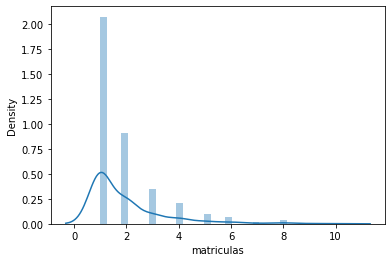

In [ ]:
# Grafica de distribucion de matriculas por alumno
sns.distplot(nombres.matriculas)

In [ ]:
# Cantidad de matriculas por alumno
nombres.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

In [ ]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominioemail.com.pe,jose@dominioemail.com.pe,1
1,JOAO,43,@atencionalcliente.com,joao@atencionalcliente.com,4
2,ANTONIO,304,@atencionalcliente.com,antonio@atencionalcliente.com,5
3,FRANCISCO,156,@atencionalcliente.com,francisco@atencionalcliente.com,3
4,CARLOS,343,@atencionalcliente.com,carlos@atencionalcliente.com,1


# Seleccionando cursos

In [ ]:
# Creando un diccionario vacio
todas_matriculas = []
# Variables de aleatoriedad
x = np.random.rand(20)
prob = x  / sum(x)

In [ ]:
# Loop para obtener una base de datos con el id de alumno y curso
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
# Creando la tabla de datos con el diccionario con datos   
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_alumno', 'id_curso'])

In [ ]:
matriculas.tail()

,id_alumno,id_curso
763,231,10
764,99,18
765,323,19
766,383,5
767,366,10


In [ ]:
# Agrupar y contar la cantidad de alumnos por curso
matriculas.groupby('id_curso').count().join(cursos['Nombre_curso'])

,id_alumno,Nombre_curso
id_curso,,
1,24,Lógica de programação
2,7,Java para Web
3,1,C# para Web
4,22,Ruby on Rails
5,63,Cursos de Python
6,22,PHP com MySql
7,57,.NET para web
8,55,Novas integrações com Java
9,1,TDD com Java


In [ ]:
# Resumen de todas las tablas
print(nombres.head(3))
print(cursos.head(3))
print(matriculas.head(3))

    nombre  id_alumno  ...                          email matriculas
0     JOSE        235  ...       jose@dominioemail.com.pe          1
1     JOAO         43  ...     joao@atencionalcliente.com          4
2  ANTONIO        304  ...  antonio@atencionalcliente.com          5

[3 rows x 5 columns]
             Nombre_curso
id                       
1   Lógica de programação
2           Java para Web
3             C# para Web
   id_alumno  id_curso
0        235        14
1         43         7
2         43        16


In [ ]:
# Crear tabla con la cantidad de alumnos por id de curso 
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nombre_curso']).rename(columns={'id_alumno':'cantidad_alumnos'})

In [ ]:
matriculas_por_curso.head()

,cantidad_alumnos,Nombre_curso
id_curso,,
1,24,Lógica de programação
2,7,Java para Web
3,1,C# para Web
4,22,Ruby on Rails
5,63,Cursos de Python


# Salida de datos en diferentes formatos

In [ ]:
# Crear archivo csv
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
# Cargar archivos csv
pd.read_csv('matriculas_por_curso.csv')

,cantidad_alumnos,Nombre_curso
0,24,Lógica de programação
1,7,Java para Web
2,1,C# para Web
3,22,Ruby on Rails
4,63,Cursos de Python
5,22,PHP com MySql
6,57,.NET para web
7,55,Novas integrações com Java
8,1,TDD com Java
9,57,Código limpo com C#


In [ ]:
# Datos en formato json
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"cantidad_alumnos":{"1":24,"2":7,"3":1,"4":22,"5":63,"6":22,"7":57,"8":55,"9":1,"10":57,"11":11,"12":44,"13":14,"14":62,"15":68,"16":18,"17":61,"18":46,"19":84,"20":51},"Nombre_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
# Datos en formato html
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cantidad_alumnos</th>
      <th>Nombre_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>22</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>63</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>22</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>57</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>55</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
      <t

# Creando una base de datos en SQL

In [ ]:
# Instalar paquete SQLalchemy
!pip install sqlalchemy

In [ ]:
# Importar libreria
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
# Crear motor SQL
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
# Crear base de datos en SQL con archivo csv
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando en la base de datos SQL

In [ ]:
# Metodo SELECT y WHERE para filtrar
query = 'select * from matriculas where cantidad_alumnos < 20'

In [ ]:
# Leer base datos query en SQL
pd.read_sql(query, engine)

,id_curso,cantidad_alumnos,Nombre_curso
0,2,7,Java para Web
1,3,1,C# para Web
2,9,1,TDD com Java
3,11,11,Preparatório para certificação Java
4,13,14,Persistência com .NET
5,16,18,Estatística básica


In [ ]:
# Crear una tabla de total de alumnos por curso
total_matriculas = pd.read_sql_table('matriculas', engine, columns=['Nombre_curso', 'cantidad_alumnos'])

In [ ]:
# Filtrar cantidad por mayores a 80
total_matriculas = total_matriculas.query('cantidad_alumnos > 80')

In [ ]:
total_matriculas

,Nombre_curso,cantidad_alumnos
18,Boas práticas em Java,84


# Escribiendo en el banco de datos

In [ ]:
total_matriculas.to_sql('total_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'total_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nombres de alumn@s de la próxima clase

In [ ]:
# Seleccionar id curso
id_curso = 1
# Crear nueva tabla de datos 'query'
proxima_clase = matriculas.query("id_curso == {}".format(id_curso))

In [ ]:
# Asignar como indice a id_alumno
nombres.set_index('id_alumno')

In [ ]:
# Asignar como indice a id_alumno
proxima_clase.set_index('id_alumno')

In [ ]:
# Crear nueva tabla con el id de alumno (proxima clase) y datos de alumno (nombres)
proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))

,id_curso,nombre,dominio,email,matriculas
id_alumno,,,,,
21,1,CICERO,@dominioemail.com.pe,cicero@dominioemail.com.pe,2
40,1,JOELMA,@atencionalcliente.com,joelma@atencionalcliente.com,3
41,1,SILVIA,@dominioemail.com.pe,silvia@dominioemail.com.pe,2
70,1,VANESSA,@atencionalcliente.com,vanessa@atencionalcliente.com,1
79,1,JULIANO,@dominioemail.com.pe,juliano@dominioemail.com.pe,2
83,1,MANUEL,@dominioemail.com.pe,manuel@dominioemail.com.pe,2
94,1,MILTON,@dominioemail.com.pe,milton@dominioemail.com.pe,1
158,1,THIAGO,@atencionalcliente.com,thiago@atencionalcliente.com,2
164,1,REGINA,@atencionalcliente.com,regina@atencionalcliente.com,5


In [ ]:
# Obtener solo la columna 'nombre' en un nuevo dataframe
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

In [ ]:
# ubicar la columna id_curso
nombre_curso = cursos.loc[id_curso]

In [ ]:
# Nombre de columna dinamico
proxima_clase = proxima_clase.rename(columns = {'nombre': 'Alumnos del curso de {}'.format(nombre_curso)})

In [ ]:
proxima_clase.head()

,"Alumnos del curso de Nombre_curso Lógica de programação\nName: 1, dtype: object"
id_alumno,
21,CICERO
40,JOELMA
41,SILVIA
70,VANESSA
79,JULIANO
